In [27]:
from matplotlib.pylab import rcParams
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction'
# Using opendatasets let's download the data sets
od.download(dataset )

Skipping, found downloaded files in ".\medical-insurance-cost-prediction" (use force=True to force download)


In [3]:
df = pd.read_csv("D:/DataAnalysis/medical-insurance-cost-prediction/medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker']) 
df['region']= label_encoder.fit_transform(df['region']) 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
X = df[['age','sex','bmi','children','smoker','region']]
y= df['charges']
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,  random_state=10,  test_size=0.25, shuffle=True)

In [48]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

[Text(0.6417811986692897, 0.9761904761904762, 'X[4] <= 0.5\nsquared_error = 149065535.382\nsamples = 2079\nvalue = 13414.597'),
 Text(0.3870976337395224, 0.9285714285714286, 'X[0] <= 42.5\nsquared_error = 36725305.115\nsamples = 1644\nvalue = 8463.258'),
 Text(0.18227782499672576, 0.8809523809523809, 'X[3] <= 0.5\nsquared_error = 23722661.523\nsamples = 924\nvalue = 5486.114'),
 Text(0.07463928664978609, 0.8333333333333334, 'X[0] <= 22.5\nsquared_error = 20440391.704\nsamples = 378\nvalue = 3988.332'),
 Text(0.034870776215838645, 0.7857142857142857, 'X[2] <= 29.07\nsquared_error = 13186448.668\nsamples = 185\nvalue = 2615.223'),
 Text(0.020998864926220204, 0.7380952380952381, 'X[0] <= 19.5\nsquared_error = 140178.486\nsamples = 79\nvalue = 1785.851'),
 Text(0.012660438313105737, 0.6904761904761905, 'X[5] <= 1.5\nsquared_error = 72891.852\nsamples = 50\nvalue = 1594.898'),
 Text(0.004889548589889112, 0.6428571428571429, 'X[1] <= 0.5\nsquared_error = 35897.549\nsamples = 26\nvalue = 1743

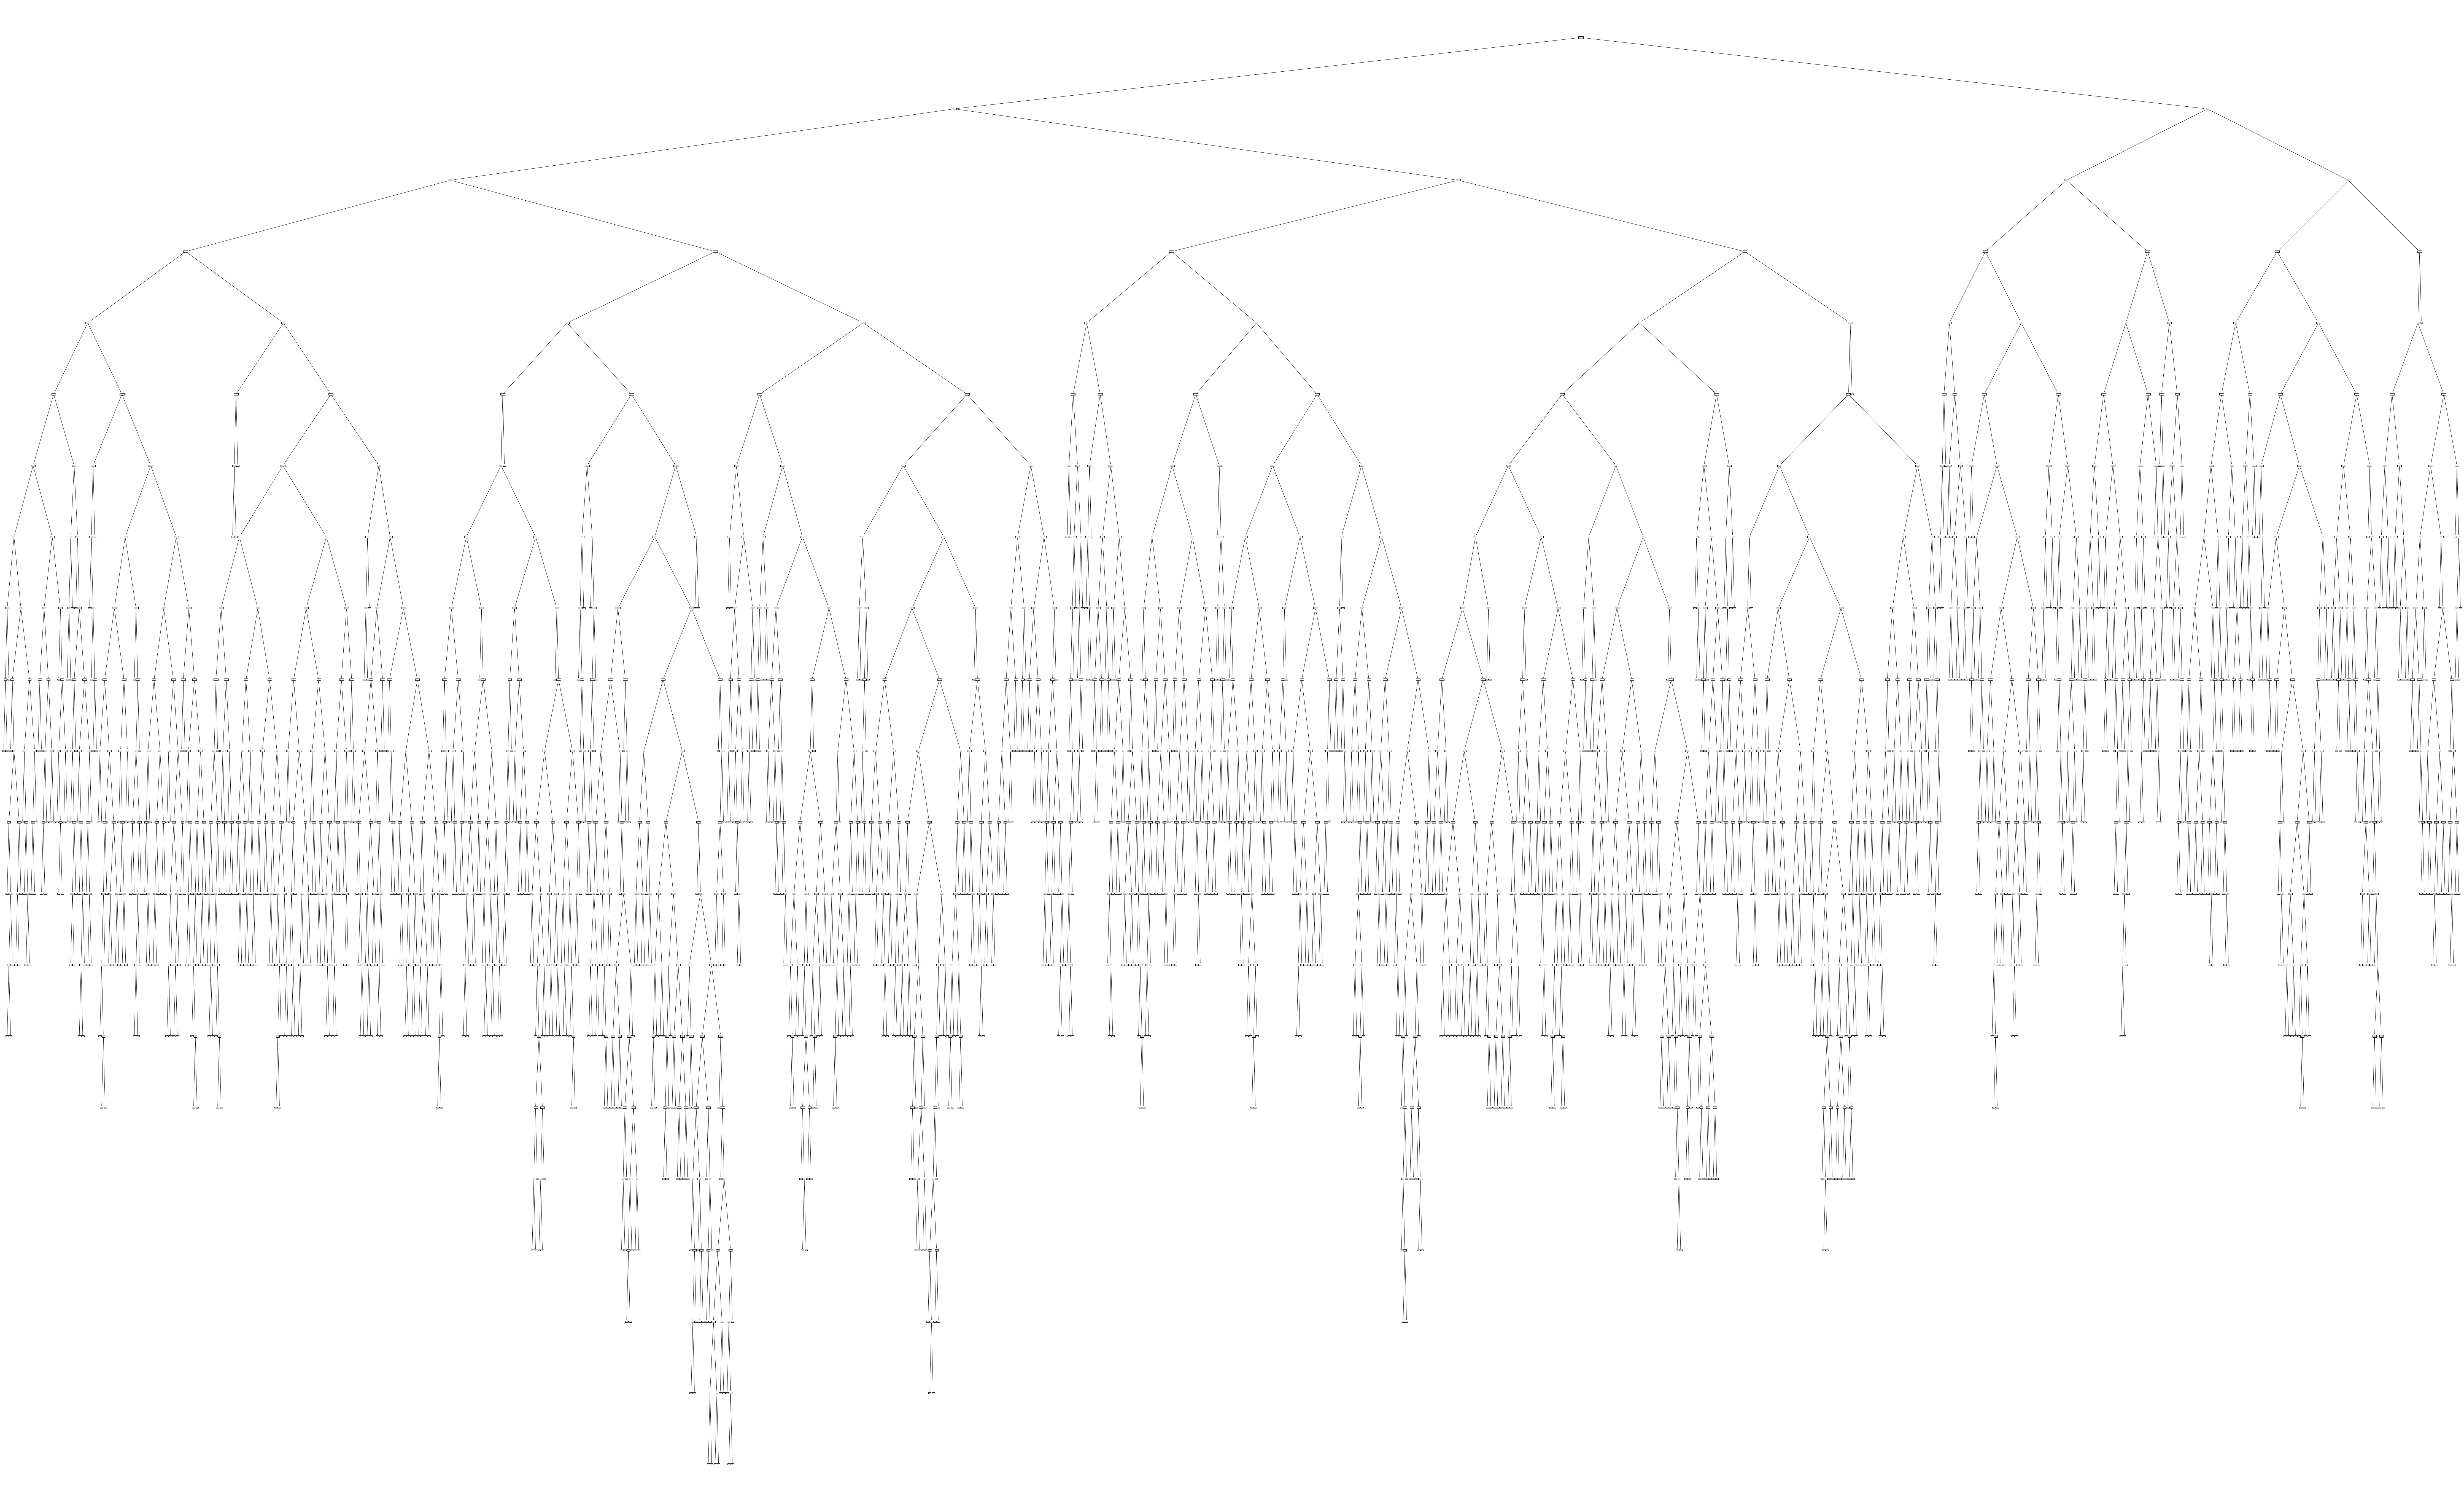

In [16]:
rcParams['figure.figsize'] = 160,100
tree.plot_tree(clf)

In [49]:
yPred= clf.predict(X_test)

In [50]:
print(np.sqrt(metrics.mean_squared_error(y_test, yPred)))
print(metrics.mean_absolute_error(y_test, yPred))

2813.7971822827512
620.7351191726792


In [51]:
metrics.r2_score(y_test, yPred)

0.9446217704633935

In [45]:
# Applying grid search 
parameters = {
              'max_depth':[10,50, 100],
              'min_samples_leaf':[10,15,20,30],
              'min_samples_split':[ 90, 100, 120,200, 250],
            'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
             }
clf = tree.DecisionTreeRegressor()
# model_DT =RandomizedSearchCV( clf, parameters,cv = 5,n_jobs = -1, verbose=True, scoring= 'r2',error_score='raise',return_train_score=True)
model_DT = GridSearchCV( estimator = clf,param_grid= parameters,cv = 5,n_jobs = -1, verbose=True, scoring= 'r2',error_score='raise',return_train_score=True)
model_DT.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [10, 50, 100],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'min_samples_split': [90, 100, 120, 200, 250]},
             return_train_score=True, scoring='r2', verbose=True)

In [38]:
# model_DT.cv_results_

In [46]:
model_DT.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=20,
                      min_samples_split=100)

In [47]:
model_DT.best_score_

0.8599783332575299